## **Nama** : Zidan Muhammad Ikvan
## **Cohort ID** : MC404D5Y0059
## **Email** : zidanikvan@gmail.com

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
air = pd.read_csv("/content/EastWestAirlines.csv")

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Gender,Age,User_Age_Group
0,1,28143,0,1,1,1,174,1,0,0,7000,Female,29,Young
1,2,19244,0,1,1,1,215,2,0,0,6968,Male,24,Young
2,3,41354,0,1,1,1,4123,4,0,0,7034,Male,57,Senior
3,4,14776,0,1,1,1,500,1,0,0,6952,Female,41,Adult
4,5,97752,0,4,1,1,43300,26,2077,4,6935,Female,30,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,Male,38,Adult
3995,4018,64385,0,1,1,1,981,5,0,0,1395,Male,68,Senior
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,Male,34,Adult
3997,4020,54899,0,1,1,1,500,1,500,1,1401,Male,29,Young


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 3999 non-null   int64 
 1   Balance            3999 non-null   int64 
 2   Qual_miles         3999 non-null   int64 
 3   cc1_miles          3999 non-null   int64 
 4   cc2_miles          3999 non-null   int64 
 5   cc3_miles          3999 non-null   int64 
 6   Bonus_miles        3999 non-null   int64 
 7   Bonus_trans        3999 non-null   int64 
 8   Flight_miles_12mo  3999 non-null   int64 
 9   Flight_trans_12    3999 non-null   int64 
 10  Days_since_enroll  3999 non-null   int64 
 11  Gender             3999 non-null   object
 12  Age                3999 non-null   int64 
 13  User_Age_Group     3999 non-null   object
dtypes: int64(12), object(2)
memory usage: 437.5+ KB


In [ ]:
air.describe(include="all")

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Gender,Age,User_Age_Group
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999,3999.000000,3999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,NaN,Senior
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2060,NaN,1820
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,NaN,48.180795,NaN
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,NaN,17.837647,NaN
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,NaN,18.000000,NaN
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,NaN,33.000000,NaN
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,NaN,48.000000,NaN
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,NaN,64.000000,NaN


In [ ]:
print("\nJumlah Data yang Hilang di Setiap Kolom:\n")
print(air.isnull().sum())  # Mengecek jumlah data yang hilang per kolom


Jumlah Data yang Hilang di Setiap Kolom:

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Gender               0
Age                  0
User_Age_Group       0
dtype: int64


In [ ]:
print("total duplikat:", air.duplicated().sum())

total duplikat: 0


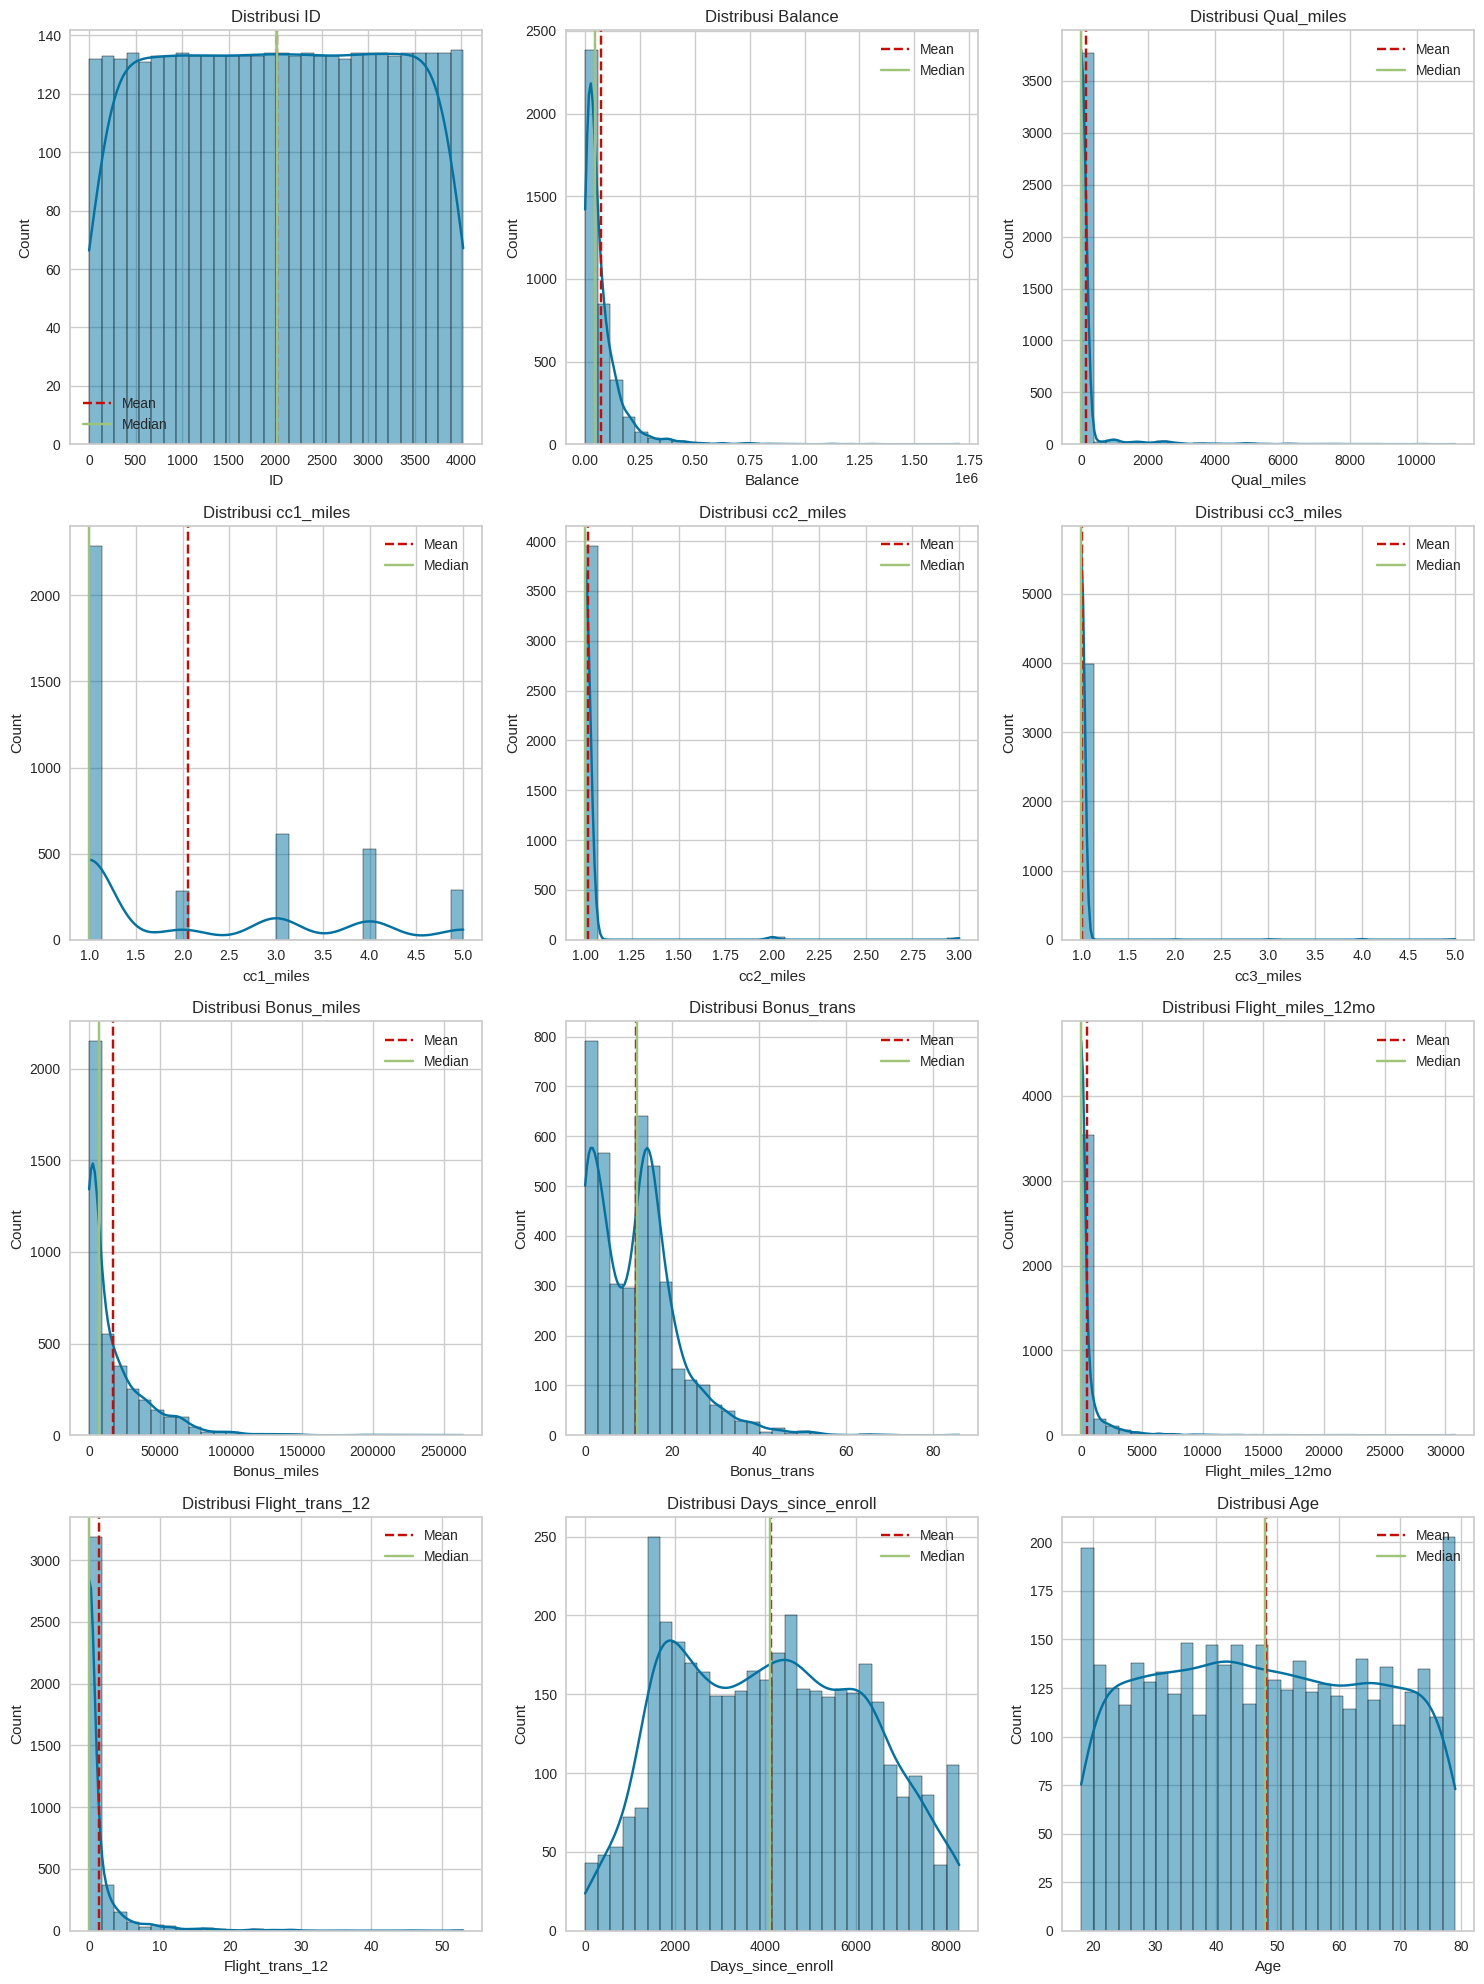

In [ ]:
# Visualisasi Distribusi
# Hitung jumlah variabel numerik
numeric_cols = air.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numeric_cols)

# Hitung grid subplot yang dibutuhkan
n_rows = (n_cols // 3) + (1 if n_cols % 3 != 0 else 0)

# Visualisasi Distribusi
plt.figure(figsize=(15, 5 * n_rows))  # Menyesuaikan ukuran figure
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)  # Dinamis berdasarkan jumlah variabel
    sns.histplot(data=air, x=col, kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.axvline(air[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(air[col].median(), color='g', linestyle='-', label='Median')
    plt.legend()
plt.tight_layout()
plt.show()

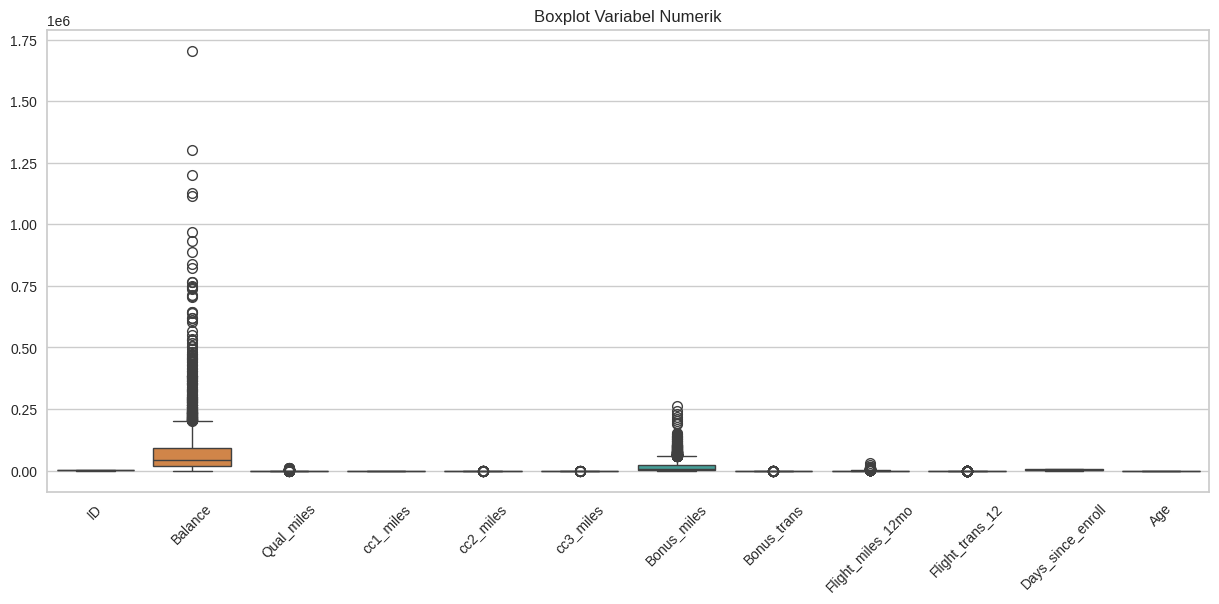

In [ ]:
# Boxplot untuk deteksi outlier
plt.figure(figsize=(15, 6))
sns.boxplot(data=air.select_dtypes(include=['int64']))
plt.title('Boxplot Variabel Numerik')
plt.xticks(rotation=45)
plt.show()

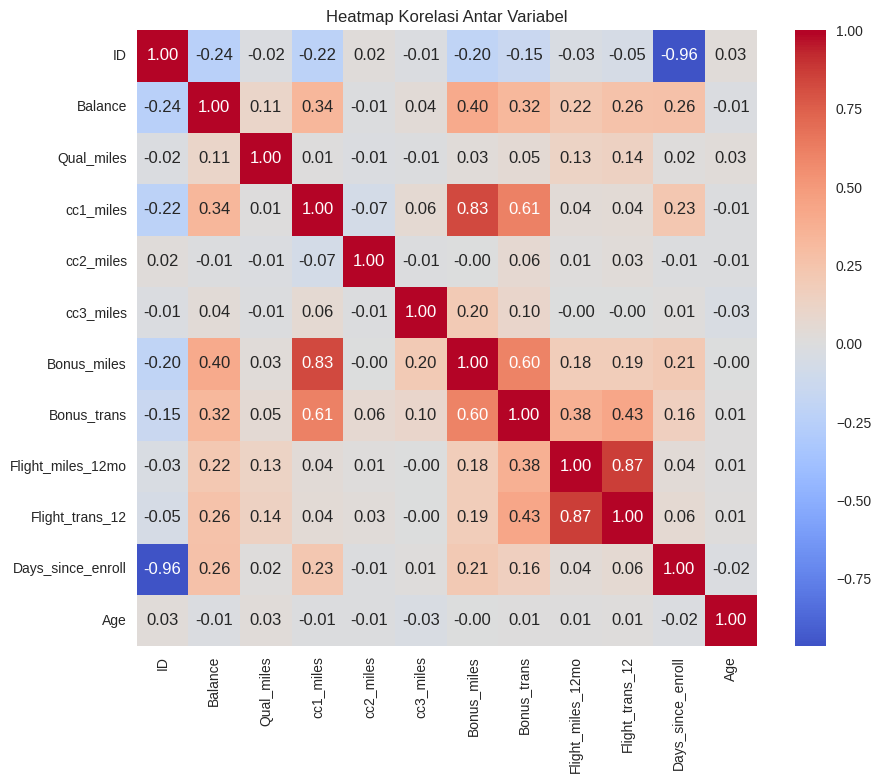

In [ ]:
# Memilih hanya kolom numerik untuk analisis korelasi
air_numeric = air.select_dtypes(include=['number'])

# Membuat matriks korelasi
corr_matrix = air_numeric.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# urutan kategori
age_order = ['Young', 'Adult', 'Senior']
air['User_Age_Group'] = pd.Categorical(air['User_Age_Group'], categories=age_order, ordered=True)

# Lakukan Label Encoding
le = LabelEncoder()
air['User_Age_Group'] = le.fit_transform(air['User_Age_Group'])


In [ ]:
# Ubah Male = 1, Female = 0
air['Gender'] = air['Gender'].map({'Male': 1, 'Female': 0})


In [ ]:
# Menentukan kolom numerik (selain ID)
numerical_cols = air.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove("ID")  # Menghapus ID karena bukan variabel numerik yang relevan

# Menggunakan metode IQR untuk mengganti outlier dengan median
for col in numerical_cols:
    Q1 = air[col].quantile(0.25)
    Q3 = air[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = air[col].median()

    # Ganti outlier dengan median
    air[col] = air[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

print("Outlier berhasil diganti dengan median")


Outlier berhasil diganti dengan median


In [ ]:
# Memilih kolom untuk dinormalisasi
num_cols = ['Balance', 'Bonus_miles', 'Bonus_trans', 'Days_since_enroll']

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Transformasi data
air[num_cols] = scaler.fit_transform(air[num_cols])

# Cek hasil
print(air.head())

   ID   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0   1  0.138885         0.0          1        1.0        1.0     0.003026   
1   2  0.094968         0.0          1        1.0        1.0     0.003739   
2   3  0.204080         0.0          1        1.0        1.0     0.071698   
3   4  0.072919         0.0          1        1.0        1.0     0.008695   
4   5  0.482402         0.0          4        1.0        1.0     0.752978   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Gender  \
0     0.026316                0.0              0.0           0.843742       0   
1     0.052632                0.0              0.0           0.839884       1   
2     0.105263                0.0              0.0           0.847842       1   
3     0.026316                0.0              0.0           0.837955       0   
4     0.684211                0.0              0.0           0.835905       0   

   Age  User_Age_Group  
0   29               2  


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

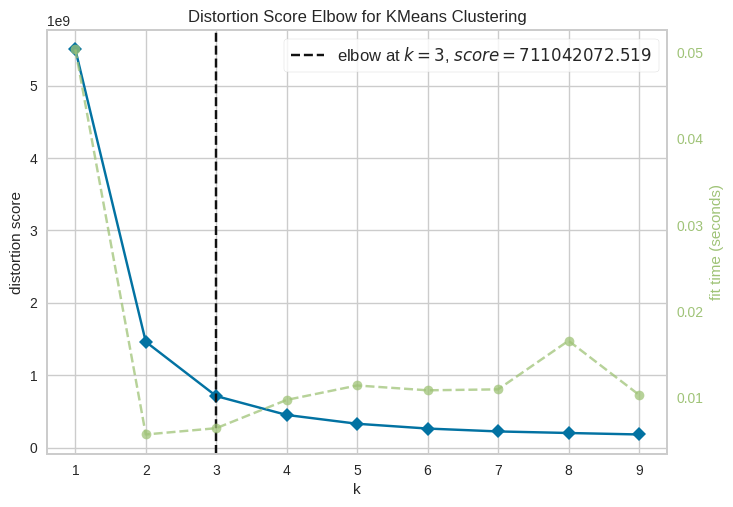

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(air)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(air)  # Gunakan hanya fitur yang dipilih
labels = kmeans.labels_  # Simpan label cluster

# Menambahkan label hasil clustering ke dalam dataframe
air['Cluster'] = labels  # Menggunakan variabel labels yang sudah ada

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(df, cluster_labels, k):
    print("\nAnalisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[cluster_labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_values = cluster_data.mean(axis=0)

        print(f"\nCluster {cluster_id + 1} (Jumlah anggota: {len(cluster_data)}):")
        for col, mean_val in mean_values.items():
            print(f"{col}: {mean_val:.3f}")

# Analisis karakteristik setiap cluster
analyze_clusters(air, labels, 3)


Analisis Karakteristik Setiap Cluster:

Cluster 1 (Jumlah anggota: 1332):
ID: 2018.390
Balance: 0.282
Qual_miles: 0.000
cc1_miles: 2.128
cc2_miles: 1.000
cc3_miles: 1.000
Bonus_miles: 0.222
Bonus_trans: 0.297
Flight_miles_12mo: 73.098
Flight_trans_12: 0.264
Days_since_enroll: 0.484
Gender: 0.501
Age: 47.488
User_Age_Group: 0.926
Cluster: 0.000

Cluster 2 (Jumlah anggota: 1336):
ID: 675.567
Balance: 0.300
Qual_miles: 0.000
cc1_miles: 2.385
cc2_miles: 1.000
cc3_miles: 1.000
Bonus_miles: 0.237
Bonus_trans: 0.330
Flight_miles_12mo: 68.715
Flight_trans_12: 0.248
Days_since_enroll: 0.781
Gender: 0.493
Age: 48.109
User_Age_Group: 0.847
Cluster: 1.000

Cluster 3 (Jumlah anggota: 1331):
ID: 3355.530
Balance: 0.204
Qual_miles: 0.000
cc1_miles: 1.663
cc2_miles: 1.000
cc3_miles: 1.000
Bonus_miles: 0.160
Bonus_trans: 0.246
Flight_miles_12mo: 60.464
Flight_trans_12: 0.204
Days_since_enroll: 0.222
Gender: 0.461
Age: 48.947
User_Age_Group: 0.854
Cluster: 2.000


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Untuk n_clusters = 2, silhouette score adalah 0.6055259055341756
Untuk n_clusters = 3, silhouette score adalah 0.5523808683703162
Untuk n_clusters = 4, silhouette score adalah 0.517828038433493
Untuk n_clusters = 5, silhouette score adalah 0.4908296280109373
Untuk n_clusters = 6, silhouette score adalah 0.46971849458136267


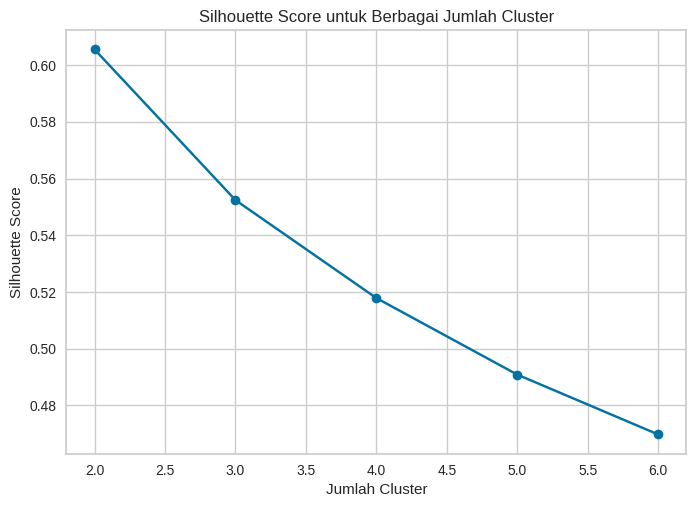

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(air)
    silhouette_avg = silhouette_score(air, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, silhouette score adalah {silhouette_avg}")

# Plot Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Berbagai Jumlah Cluster")
plt.show()


In [ ]:
# Evaluasi Silhouette Score dengan jumlah cluster = 3
kmeans_3 = KMeans(n_clusters=3, random_state=0, n_init=10)
labels_3 = kmeans_3.fit_predict(air)

silhouette_score_3 = silhouette_score(air, labels_3)
print(f"Silhouette Score dengan 3 cluster: {silhouette_score_3:.4f}")



Silhouette Score dengan 3 cluster: 0.5524


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

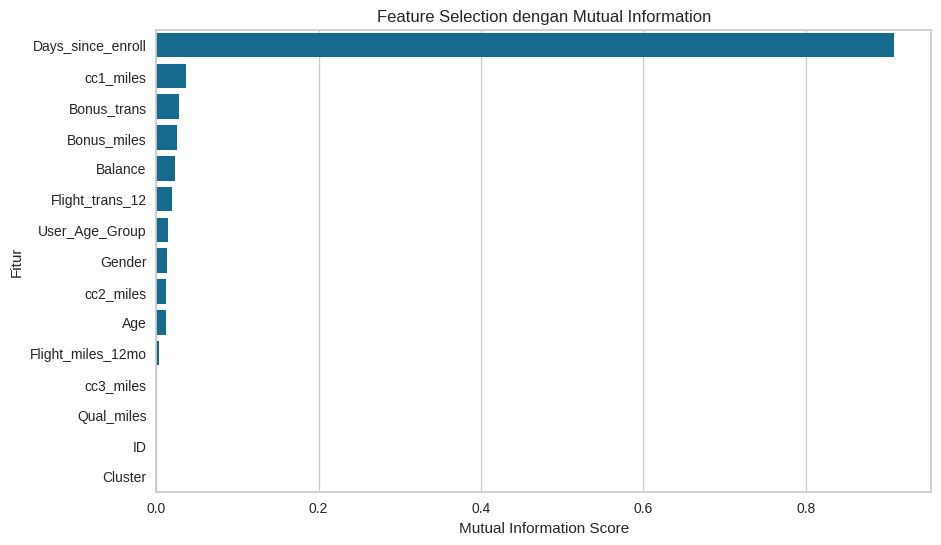

Fitur yang dipilih untuk clustering: ['Days_since_enroll', 'cc1_miles', 'Bonus_trans', 'Bonus_miles', 'Balance']


In [ ]:
# Hitung Mutual Information untuk semua fitur kecuali 'Cluster'
mi_scores = mutual_info_classif(air.drop(columns=['Cluster']), air['Cluster'])

# Buat Series skor MI
feature_scores = pd.Series(mi_scores, index=air.drop(columns=['Cluster']).columns)

# Beri skor 0 untuk fitur ID dan Cluster
feature_scores['ID'] = 0
feature_scores['Cluster'] = 0

# Urutkan fitur berdasarkan skor MI
feature_scores = feature_scores.sort_values(ascending=False)

# Visualisasi skor fitur
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel("Mutual Information Score")
plt.ylabel("Fitur")
plt.title("Feature Selection dengan Mutual Information")
plt.show()

# Pilih lima fitur terbaik, tanpa menyertakan ID dan Cluster
selected_features = feature_scores.drop(['ID', 'Cluster']).index[:5].tolist()

print("Fitur yang dipilih untuk clustering:", selected_features)

In [ ]:
# Data dan Feature Selection
selected_features = ['Days_since_enroll', 'cc1_miles', 'Bonus_trans', 'Bonus_miles', 'Balance']
air_selected = air[selected_features].copy()  # Gunakan copy untuk menghindari SettingWithCopyWarning


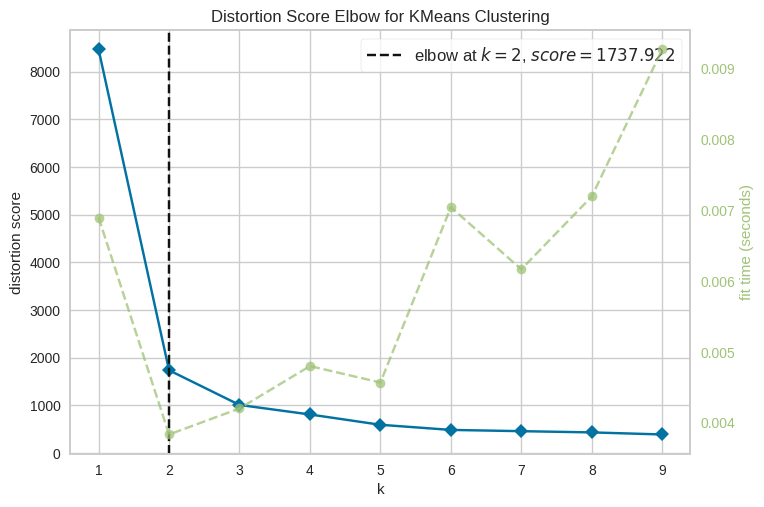

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(air_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
print("Fitur yang dipilih untuk clustering:", selected_features)

# Clustering sebelum feature selection
kmeans_before = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_before.fit(air)
silhouette_before = silhouette_score(air, kmeans_before.labels_)
print("Silhouette Score sebelum feature selection:", silhouette_before)

# Clustering dengan Feature Selection
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(air_selected)
air_selected['Cluster'] = cluster_labels  # Menambahkan label kluster ke DataFrame

# Evaluasi Clustering
silhouette_avg = silhouette_score(air_selected, cluster_labels)
print("\nSilhouette Score setelah feature selection:", silhouette_avg)

# Fungsi untuk Analisis Kluster
def analyze_selected_clusters(data, cluster_labels, num_clusters):
    """
    Menganalisis karakteristik setiap kluster berdasarkan fitur yang dipilih.

    Parameters:
        data (DataFrame): Data yang sudah melalui feature selection.
        cluster_labels (array): Label kluster dari K-Means.
        num_clusters (int): Jumlah kluster.
    """
    # Gabungkan label kluster dengan data
    clustered_data = data.copy()
    clustered_data['Cluster'] = cluster_labels

    # Analisis statistik per kluster
    cluster_stats = clustered_data.groupby('Cluster').mean()
    print("\nAnalisis Statistik per Kluster:")
    print(cluster_stats)

    # Interpretasi kluster
    print("\nInterpretasi Kluster:")
    for cluster in range(num_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        print(f"\nKluster {cluster}:")
        print(f"- Jumlah anggota: {len(cluster_data)}")
        for feature in data.columns:
            print(f"- Rata-rata {feature}: {cluster_data[feature].mean():.2f}")

# Jalankan analisis kluster
analyze_selected_clusters(air_selected.drop(columns=['Cluster']), cluster_labels, 2)

Fitur yang dipilih untuk clustering: ['Days_since_enroll', 'cc1_miles', 'Bonus_trans', 'Bonus_miles', 'Balance']
Silhouette Score sebelum feature selection: 0.5523641799017184

Silhouette Score setelah feature selection: 0.7229288953783748

Analisis Statistik per Kluster:
         Days_since_enroll  cc1_miles  Bonus_trans  Bonus_miles   Balance
Cluster                                                                  
0                 0.459410   1.110377     0.193221     0.079453  0.199205
1                 0.562945   3.772090     0.467650     0.435893  0.375681

Interpretasi Kluster:

Kluster 0:
- Jumlah anggota: 2573
- Rata-rata Days_since_enroll: 0.46
- Rata-rata cc1_miles: 1.11
- Rata-rata Bonus_trans: 0.19
- Rata-rata Bonus_miles: 0.08
- Rata-rata Balance: 0.20

Kluster 1:
- Jumlah anggota: 1426
- Rata-rata Days_since_enroll: 0.56
- Rata-rata cc1_miles: 3.77
- Rata-rata Bonus_trans: 0.47
- Rata-rata Bonus_miles: 0.44
- Rata-rata Balance: 0.38


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

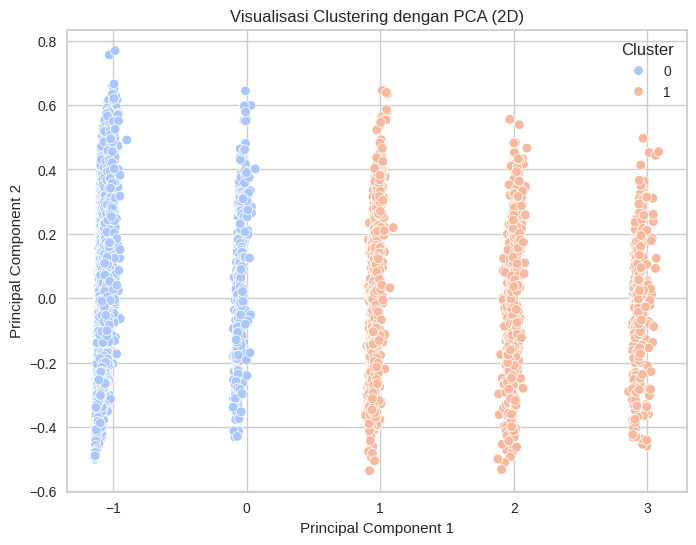

In [ ]:
# Visualisasi dengan PCA
# Reduksi dimensi ke 2D
pca = PCA(n_components=2)
air_pca = pca.fit_transform(air_selected.drop(columns=['Cluster']))

# Plot hasil clustering setelah PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=air_pca[:, 0], y=air_pca[:, 1], hue=cluster_labels, palette='coolwarm')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Clustering dengan PCA (2D)')
plt.legend(title="Cluster")
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
    """
    Saya sudah menambahkan hasil label cluster ke dataframe air_selected

    Saya hanya menggunakan label encoding pada DataFrame air (digunakan
    sebelum feature selection. Sedangkan fitur pada air_selected tidak
    dilakukan label encoder.)
    """

'\nSaya sudah menambahkan hasil label cluster ke dataframe air_selected\n\nSaya hanya menggunakan label encoding pada DataFrame air (digunakan\nsebelum feature selection. Sedangkan fitur pada air_selected tidak\ndilakukan label encoder.)\n'

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
print("Fitur yang dipilih untuk clustering:", selected_features)

# Clustering sebelum feature selection
kmeans_before = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_before.fit(air)
silhouette_before = silhouette_score(air, kmeans_before.labels_)
print("Silhouette Score sebelum feature selection:", silhouette_before)

# Clustering dengan Feature Selection
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(air_selected)
air_selected['Cluster'] = cluster_labels  # Menambahkan label kluster ke DataFrame

# Evaluasi Clustering
silhouette_avg = silhouette_score(air_selected, cluster_labels)
print("\nSilhouette Score setelah feature selection:", silhouette_avg)

# Mengembalikan data ke skala asli untuk interpretasi
air_interpret = air_selected.copy()
air_interpret[num_cols] = scaler.inverse_transform(air[num_cols])

# Fungsi untuk Analisis Kluster dengan data dalam skala asli
def analyze_selected_clusters(data, cluster_labels, num_clusters):
    """
    Menganalisis karakteristik setiap kluster berdasarkan fitur yang dipilih.

    Parameters:
        data (DataFrame): Data yang sudah melalui feature selection dan diinverse transform.
        cluster_labels (array): Label kluster dari K-Means.
        num_clusters (int): Jumlah kluster.
    """
    # Gabungkan label kluster dengan data
    clustered_data = data.copy()
    clustered_data['Cluster'] = cluster_labels

    # Analisis statistik per kluster
    cluster_stats = clustered_data.groupby('Cluster').mean()
    print("\nAnalisis Statistik per Kluster (dalam skala asli):")
    print(cluster_stats)

    # Interpretasi kluster
    print("\nInterpretasi Kluster (dalam skala asli):")
    for cluster in range(num_clusters):
        cluster_data = clustered_data[clustered_data['Cluster'] == cluster]
        print(f"\nKluster {cluster}:")
        print(f"- Jumlah anggota: {len(cluster_data)}")
        for feature in data.columns:
            if feature in num_cols:  # Hanya tampilkan fitur numerik yang dinormalisasi
                print(f"- Rata-rata {feature}: {cluster_data[feature].mean():.2f}")

# Menjalankan analisis kluster dengan data dalam skala asli
analyze_selected_clusters(air_interpret.drop(columns=['Cluster']), cluster_labels, 2)

Fitur yang dipilih untuk clustering: ['Days_since_enroll', 'cc1_miles', 'Bonus_trans', 'Bonus_miles', 'Balance']
Silhouette Score sebelum feature selection: 0.5523641799017184

Silhouette Score setelah feature selection: 0.7229288953783748

Analisis Statistik per Kluster (dalam skala asli):
         Days_since_enroll  cc1_miles  Bonus_trans   Bonus_miles       Balance
Cluster                                                                       
0              3812.349786   1.110377     7.342402   4568.944423  40366.144190
1              4671.068022   3.772090    17.770687  25066.022440  76126.437588

Interpretasi Kluster (dalam skala asli):

Kluster 0:
- Jumlah anggota: 2573
- Rata-rata Days_since_enroll: 3812.35
- Rata-rata Bonus_trans: 7.34
- Rata-rata Bonus_miles: 4568.94
- Rata-rata Balance: 40366.14

Kluster 1:
- Jumlah anggota: 1426
- Rata-rata Days_since_enroll: 4671.07
- Rata-rata Bonus_trans: 17.77
- Rata-rata Bonus_miles: 25066.02
- Rata-rata Balance: 76126.44


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Analisis Karakteristik Cluster dari Model KMeans

Berdasarkan data asli & normalisasi, berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0 (Majority Group - 2573 anggota):
- **Rata-rata Balance :** 40366.14 (≈ 0.20, relatif rendah)  
- **Rata-rata Bonus_miles :** 4568.94 (≈ 0.08, sangat rendah)
- **Rata-rata Bonus Trans:** 7.34 (≈ 0.19, rendah)
- **Rata-rata Days_since_enroll:** 3812.35 (≈ 0.46, sedang)  
- **Analisis:**
  - Kelompok ini merupakan pelanggan dengan aktivitas rendah dalam hal transaksi dan akumulasi miles.
  - Mereka memiliki saldo (balance) yang rendah, menunjukkan sedikit aktivitas transaksi atau pengeluaran.
  - Bonus miles dan bonus transaksi sangat rendah, mengindikasikan bahwa mereka jarang melakukan transaksi yang memicu reward.
  - Lama keanggotaan (Days_since_enroll) sedang, artinya meskipun sudah cukup lama bergabung, mereka tidak terlalu aktif.
- **Rekomendasi Bisnis:**
  - Target promosi untuk meningkatkan engagement, seperti:
    - Program cashback untuk transaksi pertama atau dalam hari-hari tertentu.
    - tambahan bonus miles jika melakukan transaksi dalam periode tertentu.
    - Mengirim Email promosi yang mengingatkan mereka akan manfaat membership.

## Cluster 1 (High-Value Group - 1426 anggota):
- **Rata-rata Balance :** 76126.44 (≈ 0.38, di atas rata-rata)  
- **Rata-rata Bonus_miles :** 25066.02 (≈ 0.44, signifikan lebih tinggi)
- **Rata-rata Bonus Trans:** 17.77 (≈ 0.47, tinggi)
- **Rata-rata Days_since_enroll:** 4671.07 (≈ 0.56, lebih lama dari Cluster 0)  
- **Analisis:**
  - Kelompok ini merupakan pelanggan yang lebih aktif dan bernilai tinggi.
  - Saldo (balance) lebih tinggi, menunjukkan frekuensi transaksi atau pengeluaran yang lebih besar.
  - Bonus miles dan bonus transaksi jauh lebih tinggi, mengindikasikan bahwa mereka sering melakukan transaksi yang memenuhi ketentuan reward.
  - Lama keanggotaan sedikit lebih panjang, yang mungkin berkorelasi dengan loyalitas yang lebih tinggi.
- **Rekomendasi Bisnis:**
  - Mempertahankan loyalitas mereka dengan program eksklusif, seperti:
    - Tier membership (Silver/Gold/Platinum) dengan benefit tambahan.
    - Hadiah loyalitas (extra miles, lounge access, atau diskon khusus).
    - Personalisasi penawaran berdasarkan riwayat transaksi.

### Perbandingan dengan Statistik Keseluruhan (dalam skala normalisasi)
- Mean Balance (0.26) → Cluster 0 di bawah rata-rata, Cluster 1 di atas rata-rata.  
- Mean Bonus_miles (0.21) → Cluster 0 jauh di bawah, Cluster 1 jauh di atas.
- Mean Bonus_trans (0.29) → Cluster 0 di bawah, Cluster 1 di atas.
- Days_since_enroll (0.50) → Cluster 0 sedikit di bawah, Cluster 1 sedikit di atas.

### Interpretasi:
- Clustering berhasil memisahkan pelanggan berdasarkan tingkat aktivitas dan nilai transaksi.  
- Pola yang terlihat logis secara bisnis:
  - Ada kelompok "low-engagement" (Cluster 0) yang membutuhkan dorongan aktivitas/transaksi.
  - Ada kelompok "high-value" (Cluster 1) yang perlu dipertahankan.

## Kesimpulan & Strategi Bisnis:
- Cluster 0 (Low Engagement) → Fokus pada aktivasi (promo, reminder, insentif).  
- Cluster 1 (High Value) → Fokus pada loyalitas (program eksklusif, rewards).
- Optimalkan kampanye berbeda untuk masing-masing kelompok agar lebih efektif.



# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
air_selected.to_csv('air_selected.csv', index=False)